# Minimal Left Right Symmetric models with Higgs doublets

In this notebook we study the gauge-Higgs sector

In [8]:
from sympy import symbols, init_printing, I, eye, conjugate
from sympy import Matrix, KroneckerDelta
from sympy.physics.quantum import Dagger
init_printing()

# Yukawa interactions

In [9]:
from potential_senjanovic_HiggsDoublets import ChiL, ChiR, Phi, Phitilde, PhiDagger, PhitildeDagger, k1, k2, vL, vR
from potential_senjanovic_HiggsDoublets import complex_scalar_fields, vevL, vevR, vevPhi, change_scalar_fields

In [10]:
from sympy import IndexedBase, Idx
i, j, k, l, m, n = symbols('i, j, k, l, m, n', cls=Idx)

In [11]:
Y = IndexedBase('Y')
Ytilde = IndexedBase(r'\tilde{Y}')
YL = IndexedBase('Y_L')
YR = IndexedBase('Y_R')
h = IndexedBase('h')
htilde = IndexedBase(r'\tilde{h}')
mu = IndexedBase(r'\mu')

## Lepton doublets

In [12]:
lLp = IndexedBase(r'\ell_L^{\prime}')
lRp = IndexedBase(r'\ell_R^{\prime}')
nuLp = IndexedBase(r'\nu_L^{\prime}')
nuRp = IndexedBase(r'\nu_R^{\prime}')
Singlet = IndexedBase('S')
SingletC = IndexedBase(r'S^c')

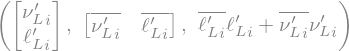

In [13]:
def LL(idx):
    return Matrix(
        [
            [nuLp[idx]],
            [lLp[idx]]
        ]
    )

def LR(idx):
    return Matrix(
        [
            [nuRp[idx]],
            [lRp[idx]]
        ]
    )

LL(i), Dagger(LL(i)), (Dagger(LL(i))*LL(i))[0]

$$\mathcal{L_{yuk}} = -\overline{L_{iL}}\left(Y_{ij}\Phi+\tilde{Y}_{ij}\tilde{\Phi}\right)L_{jR}$$

### Yukawa lagrangian

$$\mathcal{L_{yuk}} = -\overline{L}_{iR}Y_{ij}\Phi^{\dagger}L_{jL}-\overline{L}_{iR}\tilde{Y}_{ij}\tilde{\Phi}^{\dagger}L_{jL}-\overline{S}_{i}Y_{ijL}\tilde{\chi}_{L}^{\dagger}L_{jL}-\overline{S}_{i}^{c}Y_{ijR}\tilde{\chi}_{R}^{\dagger}L_{jR}-\frac{1}{2}\overline{S}_{i}^{c}\mu_{ij}S_{j}+\text{h.c.}$$

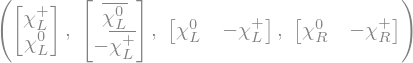

In [14]:
from sympy.physics import msigma

ChiLtilde = I*msigma(2)*conjugate(ChiL)
ChiRtilde = I*msigma(2)*conjugate(ChiR)
ChiLtildeDagger = Dagger(ChiLtilde)
ChiRtildeDagger = Dagger(ChiRtilde)
ChiL, ChiLtilde, ChiLtildeDagger, ChiRtildeDagger

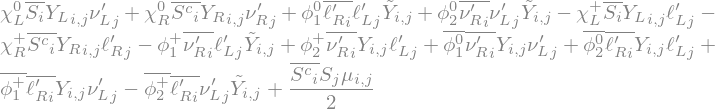

In [15]:
Lyuk_lep1 = (
    (Dagger(LR(i))*(Y[i, j])*PhiDagger*LL(j))[0] + 
    (Dagger(LR(i))*(Ytilde[i, j])*PhitildeDagger*LL(j))[0] +
    conjugate(Singlet[i])*YL[i,j]*(ChiLtildeDagger*LL(j))[0] + 
    conjugate(SingletC[i])*YR[i,j]*(ChiRtildeDagger*LR(j))[0] +
    mu[i,j]/2*conjugate(SingletC[i])*Singlet[j]
)
Lyuk_lep1.expand()

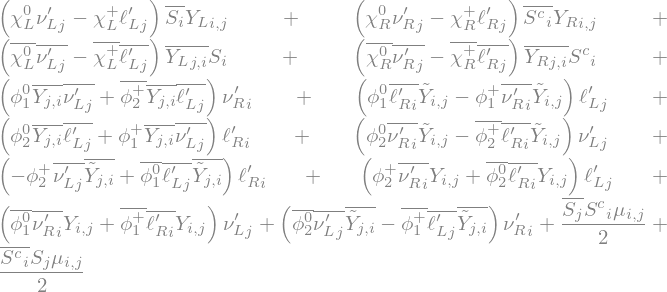

In [16]:
Lyuk_lep = (
    (Dagger(LR(i))*(Y[i, j])*PhiDagger*LL(j))[0] + 
    (Dagger(LL(j))*conjugate(Y[j, i])*Phi*LR(i))[0] + #hc
    (Dagger(LR(i))*(Ytilde[i, j])*PhitildeDagger*LL(j))[0] +
    (Dagger(LL(j))*conjugate(Ytilde[j, i])*Phitilde*LR(i))[0] + # hc
    conjugate(Singlet[i])*YL[i,j]*(ChiLtildeDagger*LL(j))[0] + 
    (Dagger(LL(j))*ChiLtilde)[0]*conjugate(YL[j, i])*Singlet[i] + # hc
    conjugate(SingletC[i])*YR[i,j]*(ChiRtildeDagger*LR(j))[0] +
    (Dagger(LR(j))*ChiRtilde)[0]*conjugate(YR[j, i])*SingletC[i] + # hc
    mu[i,j]/2*conjugate(SingletC[i])*Singlet[j] + 
    mu[i,j]/2*conjugate(Singlet[j])*SingletC[i] # hc
)

Lyuk_lep

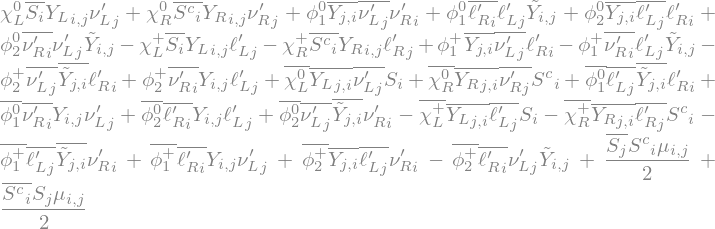

In [18]:
Lyuk_lep.expand()

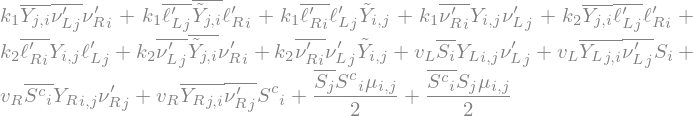

In [19]:
Lyuk_lep_vev = Lyuk_lep.subs(vevPhi).subs(vevL).subs(vevR).expand()
Lyuk_lep_vev

In [43]:
Ml = Lyuk_lep_vev.coeff(conjugate(lRp[i])).coeff(lLp[j])
Ml

In [44]:
Ml_sym = IndexedBase(r'M_\ell')
Ml_sym[i,j]

In [45]:
def Ml_expr(idx1, idx2):
    Ml = k1*Ytilde[idx1, idx2] + k2*Y[idx1, idx2]
    return Ml
Ml_expr(i,j)

In [46]:
VlL = IndexedBase('V_{L}^\ell')
VlR = IndexedBase('V_{R}^\ell')

In [47]:
def Ml_diag_expr(idx1, idx2, idx3, idx4):
    Ml_diag = conjugate(VlL[idx2, idx1])*Ml_sym[idx2, idx3]*VlR[idx3, idx4]
    return Ml_diag

Ml_diag_expr(m, k, l, n)

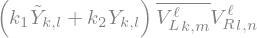

In [48]:
Ml_diag_expr(m, k, l, n).subs(Ml_sym[k, l], Ml_expr(k, l))

In [49]:
lL = IndexedBase(r'\ell_L')
lR = IndexedBase(r'\ell_R')
nL = IndexedBase(r'n_L')
nR = IndexedBase(r'n_R')

In [50]:
def lLp_expr(idx1, idx2):
    return VlL[idx1,idx2]*lL[idx2]
def lRp_expr(idx1, idx2):
    return VlR[idx1,idx2]*lR[idx2]
def lLp_adj_expr(idx1, idx2):
    return conjugate(VlL[idx2,idx1])*conjugate(lL[idx2])
def lRp_adj_expr(idx1, idx2):
    return conjugate(VlR[idx2,idx1])*conjugate(lR[idx2])


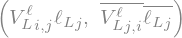

In [51]:
lLp_expr(i,j), lLp_adj_expr(i,j)

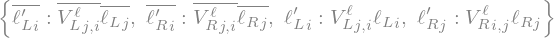

In [52]:
def change_charged_leptons(idx1, idx2):
    return {
        lLp[idx1]: lLp_expr(idx2, idx1),
        lRp[idx2]: lRp_expr(idx1, idx2),
        conjugate(lLp[idx1]): lLp_adj_expr(idx1, idx2),
        conjugate(lRp[idx1]): lRp_adj_expr(idx1, idx2)
    }
change_charged_leptons(i,j)

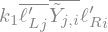

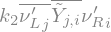

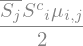

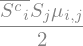

In [53]:
terms = Lyuk_lep_vev.expand().as_ordered_terms()
for term in terms:
    for t in term.args:
        if t.has(lLp):
            idx1 = t.args[0]
        if t.has(lRp):
            idx2 = t.args[0]
    display(term)


If $$V_L^\ell = V_R^\ell = V^\ell$$

In [54]:
Vl = IndexedBase('V^\ell')

if $V^\ell = \mathbf{1}$, then,
$$\overline{{V^{\ell}}_{j,i}} {V^{\ell}}_{i,j} = \delta_{i,j} $$

#### Leptons interaction with scalars

In [55]:
#Lyuk_charged_lep_basis = Lyuk_lep.subs(change_charged_leptons(i,j)).expand().replace(VlL, Vl).subs(VlR, Vl)
#Lyuk_charged_lep_basis

In [33]:
#Lyuk_charged_leptons_physical_basis = 0
#for term in Lyuk_charged_lep_basis.args:
#    if term.has(lL) and term.has(lR) and not(term.has(nuLp) or term.has(nuRp)):
#        Lyuk_charged_leptons_physical_basis += term

In [34]:
#Lyuk_charged_leptons_physical_basis.subs(complex_scalar_fields).subs(change_scalar_fields)

In [35]:
#Lyuk_charged_leptons_physical_basis.subs(complex_scalar_fields).subs(change_scalar_fields).replace(VlL, Vl).subs(VlR, Vl).subs(
#    conjugate(Vl[j, i]), KroneckerDelta(i,j)/Vl[i,j]
#).subs(
#    conjugate(Vl[i, j])*Vl[j,i], KroneckerDelta(i,j)
#).subs(j,i).collect([Y[i,i], Ytilde[i,i]])

### Neutrino sector

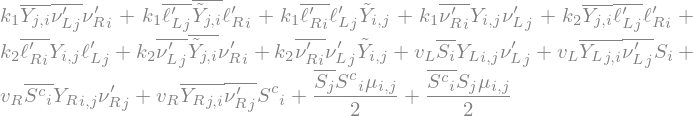

In [56]:
Lyuk_lep_vev

In [57]:
mD = Lyuk_lep_vev.coeff(conjugate(nuRp[i])).coeff(nuLp[j])
mD

In [58]:
mDp = Lyuk_lep_vev.coeff(conjugate(Singlet[i])).coeff(nuLp[j])
mDp

In [59]:
MD = Lyuk_lep_vev.coeff(conjugate(SingletC[i])).coeff(nuRp[j])
MD

In [60]:
Ml

In [61]:
mD_sym = IndexedBase('m_D')
mDp_sym = IndexedBase('m_D^\prime')
MD_sym = IndexedBase('M_D')

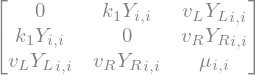

In [64]:
Mnu1 = Matrix(
    [
        [0, mD, mDp],
        [mD, 0, MD],
        [mDp, MD, mu[i,j]]
    ]
).subs(k2, 0).subs(j, i)
Mnu1

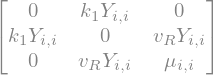

In [65]:
Mnu1Y = Mnu1.replace(YL[i,i], 0).replace(YR, Y)
Mnu1Y

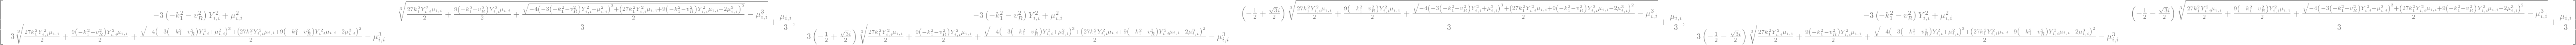

In [66]:
eigenvals1Y = list(Mnu1Y.eigenvals().keys())
eigenvals1Y

In [67]:
#epsilonL = symbols('epsilon_L')
epsilon1 = symbols('epsilon_1')
epsilon = symbols('epsilon')

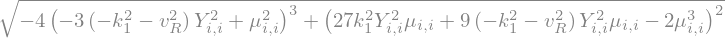

In [68]:
sqrt_iss = eigenvals1Y[0].args[0].args[1].args[0].args[0].args[1]
sqrt_iss

In [69]:
from symbolic_tools import multivariable_taylor_optimized

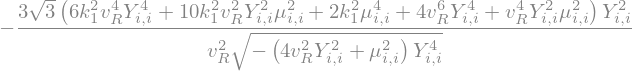

In [70]:
multivariable_taylor_optimized(
    sqrt_iss.subs(k1, epsilon1*vR), [epsilon1], [0], 2
).subs(epsilon1, k1/vR).factor()

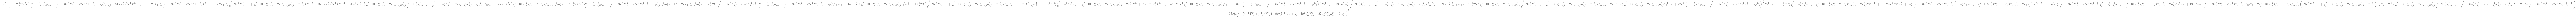

In [71]:
multivariable_taylor_optimized(
    eigenvals1Y[0].subs(k1, epsilon1*vR), [epsilon1], [0], 2
).subs(epsilon1, k1/vR).factor()

In [72]:
from sympy import Eq, solve

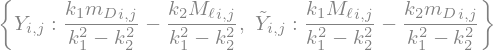

In [73]:
YYtilde_sol = solve([Eq(Ml_sym[i,j], Ml), Eq(mD_sym[i,j], mD)], [Y[i,j], Ytilde[i,j]], dict=True)[0]
YYtilde_sol

In [74]:
for y in YYtilde_sol:
    YYtilde_sol[y] = YYtilde_sol[y].simplify()

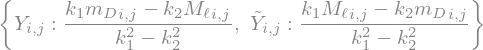

In [75]:
YYtilde_sol

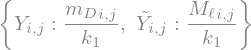

In [76]:
YYtilde_sol_k2_0 = {}
for y in YYtilde_sol:
    YYtilde_sol_k2_0[y] = YYtilde_sol[y].subs(k2,0)

YYtilde_sol_k2_0

## Covariant derivative

In [77]:
from Gauge_Higgs_senjanovic_HiggsDoublets import WsigmaL, WsigmaR, partial_mu, Bmu, g, gBL

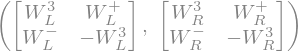

In [78]:
WsigmaL, WsigmaR

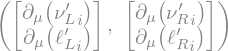

In [79]:
def partial_mu_LL(idx):
    return Matrix(
        [
            [partial_mu(nuLp[idx])],
            [partial_mu(lLp[idx])]
        ]
    )
def partial_mu_LR(idx):
    return Matrix(
        [
            [partial_mu(nuRp[idx])],
            [partial_mu(lRp[idx])]
        ]
    )
partial_mu_LL(i), partial_mu_LR(i)

In [80]:
DmuL = - I*g/2*WsigmaL + I*gBL/2*Bmu*eye(2)
DmuR = - I*g/2*WsigmaR + I*gBL/2*Bmu*eye(2)

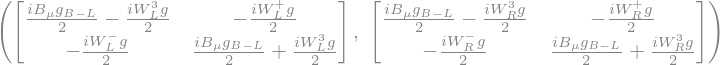

In [82]:
DmuL, DmuR

In [83]:
def Dmu_LL(idx):
    return partial_mu_LL(idx) +  DmuL*LL(idx) 
def Dmu_LR(idx):
    return partial_mu_LR(idx) + DmuR*LR(idx)

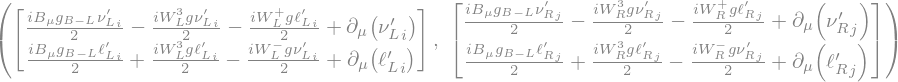

In [84]:
Dmu_LL(i).applyfunc(lambda x:x.expand()), Dmu_LR(j).applyfunc(lambda x:x.expand())

In [85]:
from Gauge_Higgs_senjanovic_HiggsDoublets import WLp, WRp, WLm, WRm

In [86]:
conjugate_fields = {
    conjugate(WLp):WLm,
    conjugate(WLm):WLp,
    conjugate(WRm):WRp,
    conjugate(WRp):WRm,
    #conjugate(chiL0): chiL0,
    #conjugate(partial_mu(chiRp)): partial_mu(chiRm)
}

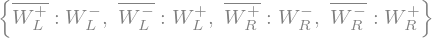

In [87]:
conjugate_fields

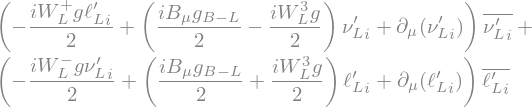

In [88]:
def LL_Dmu_LL(idx):
    return (Dagger(LL(idx))*Dmu_LL(idx))[0]
LL_Dmu_LL(i)


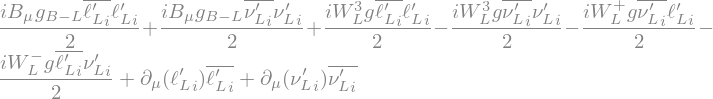

In [89]:
LL_Dmu_LL(i).expand()

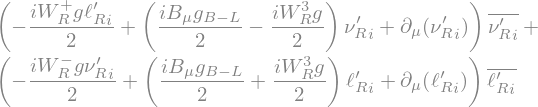

In [90]:
def LR_Dmu_LR(idx):
    return (Dagger(LR(idx))*Dmu_LR(idx))[0]
LR_Dmu_LR(i)

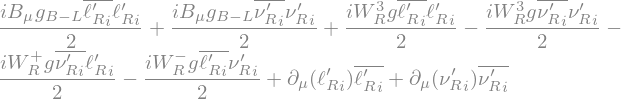

In [91]:
LR_Dmu_LR(i).expand()

## Kinetic Lagrangian of fermions

In [158]:
gamma_mu = symbols(r'\gamma^\mu')

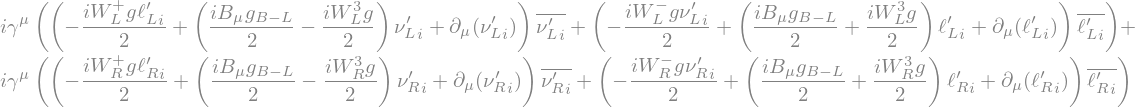

In [159]:
Lag_leptons = I*gamma_mu*LL_Dmu_LL(i) + I*gamma_mu*LR_Dmu_LR(i)
Lag_leptons

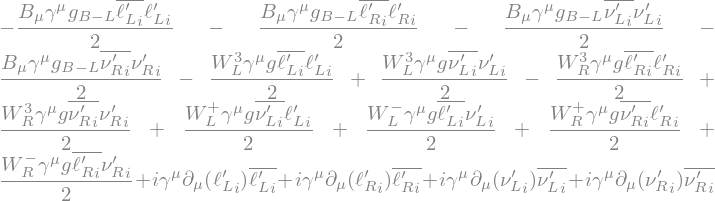

In [160]:
Lag_leptons.expand()

In [161]:
from symbolic_tools import PL, PR

In [162]:
from Gauge_Higgs_senjanovic_HiggsDoublets import change_charged_bosons_approx, change_neutral_bosons_approx
from Gauge_Higgs_senjanovic_HiggsDoublets import W1p, W1m, W2p, W2m

In [163]:
#lL = IndexedBase(r'\ell_L')
#lR = IndexedBase(r'\ell_R')
#nuL = IndexedBase(r'\nu_L')
#nuR = IndexedBase(r'\nu_R')

In [164]:
#conjugate(nuL[i])*PL

In [165]:
#changes_chiral_fermions = {
#    nuLp[i]:PL*nuL[i],
#    conjugate(nuLp[i]): conjugate(nuL[i])*PR,
#    nuRp[i]:PR*nuR[i],
#    conjugate(nuRp[i]): conjugate(nuR[i])*PL,
#    lLp[i]:PL*lL[i],
#    conjugate(lLp[i]): conjugate(lL[i])*PR,
#    lRp[i]:PR*lR[i],
#    conjugate(lRp[i]): conjugate(lR[i])*PL
#}
#changes_chiral_fermions

In [166]:
from sympy import sin, cos, sqrt, factor
from Gauge_Higgs_senjanovic_HiggsDoublets import thw, Z1, Z2

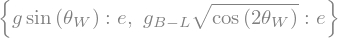

In [167]:
e = symbols('e', positive=True)
e_changes = {
    g*sin(thw):e,
    gBL*sqrt(cos(2*thw)):e
}
e_changes

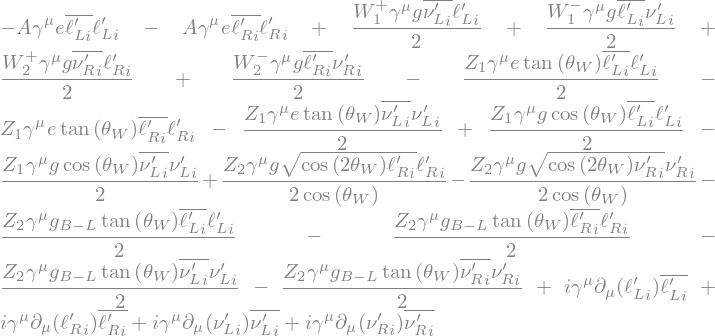

In [168]:
Lag_leptons_phys1 = Lag_leptons.subs(change_charged_bosons_approx).subs(change_neutral_bosons_approx).expand().subs(e_changes)
Lag_leptons_phys1

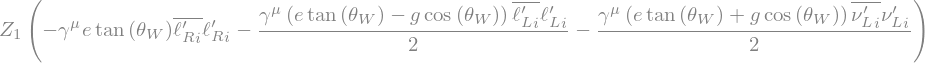

In [169]:
Z1*(Lag_leptons_phys1.coeff(Z1).collect([conjugate(lLp[i])*lLp[i], conjugate(nuLp[i])*nuLp[i]], factor))

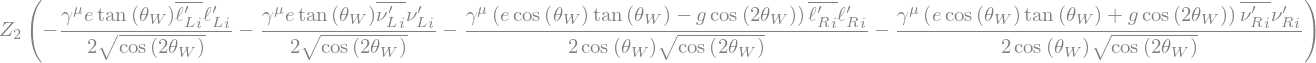

In [104]:
Z2*(Lag_leptons_phys1.coeff(Z2).collect(
    [
        conjugate(lLp[i])*lLp[i], conjugate(lRp[i])*lRp[i],
        conjugate(nuLp[i])*nuLp[i], conjugate(nuRp[i])*nuRp[i]
    ], lambda x:x.factor().subs(gBL, g*sin(thw)/sqrt(cos(2*thw))).expand().subs(e_changes).factor()
)
)

In [105]:
from potential_senjanovic_HiggsDoublets import change_scalar_fields_approx, complex_scalar_fields, H10

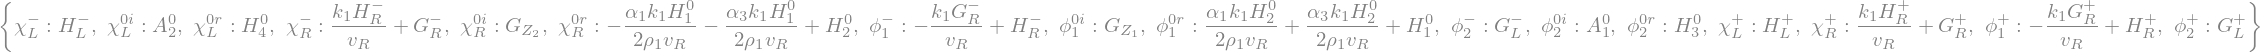

In [106]:
change_scalar_fields_approx

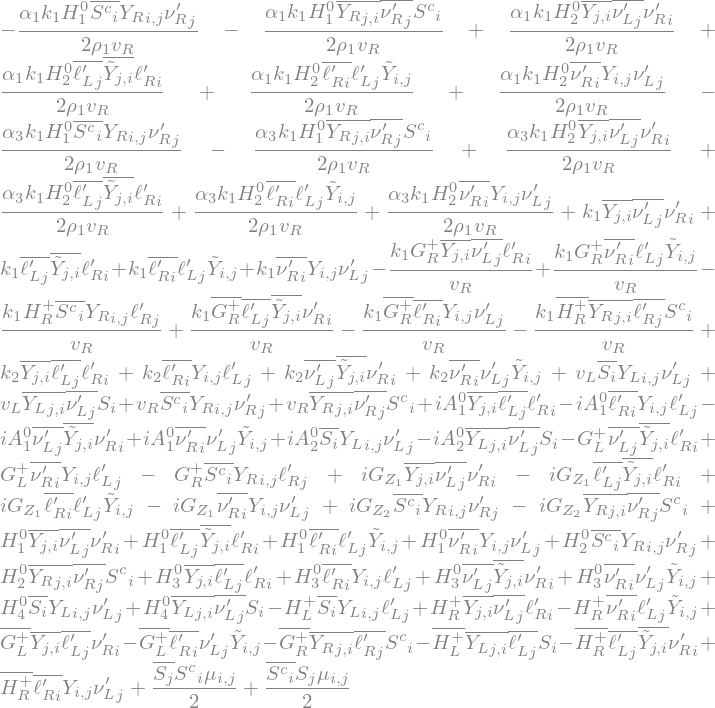

In [107]:
Lyuk_lep_phys1 = Lyuk_lep.subs(complex_scalar_fields).subs(change_scalar_fields_approx).expand()
Lyuk_lep_phys1

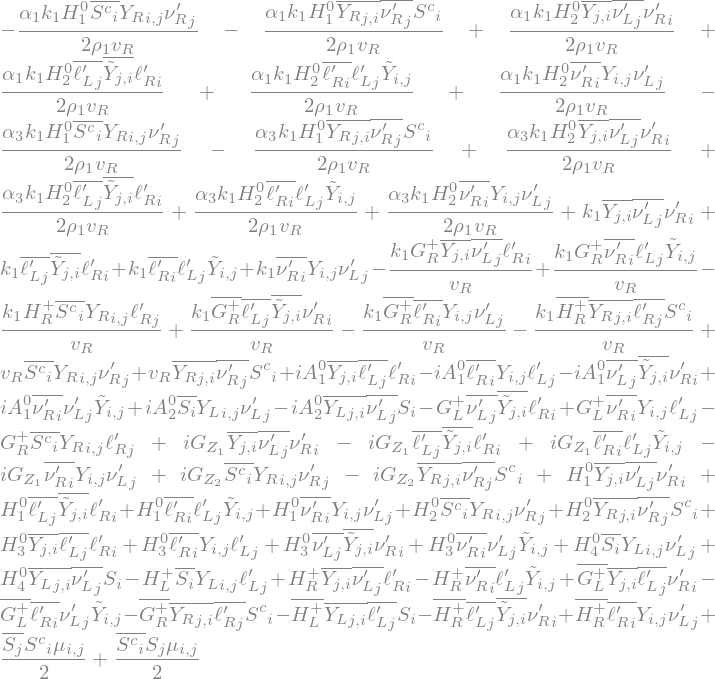

In [109]:
Lyuk_lep_phys1_k20 = Lyuk_lep_phys1.subs(vL, 0).subs(k2, 0)
Lyuk_lep_phys1_k20

In [110]:
MD = IndexedBase('M_D')
mD = IndexedBase('m_D')


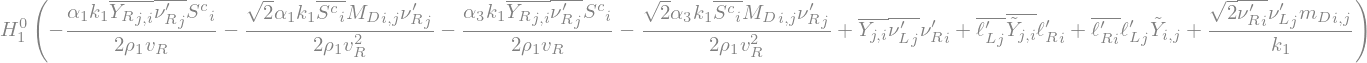

In [112]:
L_H10 = H10*(Lyuk_lep_phys1.subs(vL, 0).subs(k2, 0).coeff(H10).collect(
    [
        conjugate(lLp[i])*lLp[i], conjugate(lRp[i])*lRp[i],
        conjugate(nuLp[i])*nuLp[i], conjugate(nuRp[i])*nuRp[i]
    ], lambda x:x.expand()
).subs(
    Y[i,j], (sqrt(2)/k1)*mD[i, j]
).subs(
    YR[i,j], (sqrt(2)/vR)*MD[i, j]
)#.subs(
#    mD[i,j], (k1/vR)*MD[i,j]
#)
)
L_H10

In [ ]:
nuL = IndexedBase('n_L')
nuR = IndexedBase('n_R')

UR = IndexedBase('U^R')
UL = IndexedBase('U^L')
US = IndexedBase('U^S')

In [153]:

n_changes = {
    conjugate(YR[j, i])*conjugate(nuRp[j])*SingletC[i]:conjugate(nuR[j])*(UR[k,j])*conjugate(YR[l, k])*US[l,i]*nuL[i],
    conjugate(SingletC[i])*MD[i,j]*nuRp[j]:conjugate(nuL[i])*conjugate(US[k, i])*MD[k,l]*UR[l,j]*nuR[j],
    conjugate(nuRp[i])*nuLp[j]*mD[i,j]:conjugate(nuR[i])*(UR[k,i])*MD[k,l]*UL[l,j]*nuL[j],
    conjugate(Y[j, i])*conjugate(nuLp[j])*nuRp[i]:conjugate(nuL[j])*conjugate(UL[k, j])*conjugate(Y[l, k])*UR[l,i]*nuR[i]
}
ml = IndexedBase(r'm_\ell')
l_changes = {
    conjugate(lLp[j])*conjugate(Ytilde[j,i])*lRp[i]:(conjugate(lL[j])*(ml[k]*KroneckerDelta(k,i))*lR[i]/k1).subs(k,i),
    conjugate(lRp[i])*Ytilde[i,j]*lLp[j]:(conjugate(lR[i])*(ml[k]*KroneckerDelta(k,j))*lL[j]/k1).subs(k, j)
}


In [127]:
for exp_weak, exp_phys in n_changes.items():
    print('Basis changes')
    print(f'Weak: ')
    display(exp_weak)
    print(f'Physical: ')
    display(exp_phys)

Basis changes
Weak: 


Physical: 


Basis changes
Weak: 


Physical: 


Basis changes
Weak: 


Physical: 


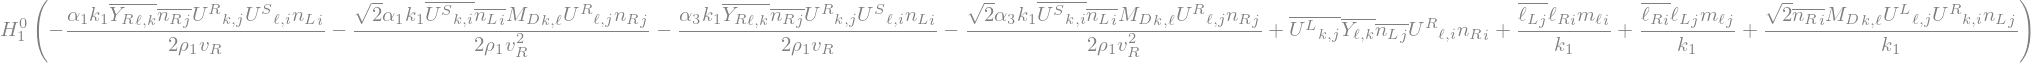

In [154]:
L_H10_phys = L_H10.subs(n_changes).subs(l_changes)
L_H10_phys

In [155]:
terms_L_H10 = L_H10_phys.expand().as_ordered_terms()
H10ll = 0
H10nn = 0
for term in terms_L_H10:
    if term.has(lL[j]) or term.has(lR[i]):
        H10ll += term
    else:
        H10nn += term

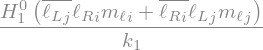

In [156]:
H10ll.subs(k,i).factor()

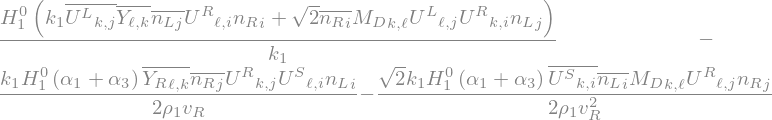

In [157]:
H10nn.collect(
    [conjugate(nuL[i])*nuR[j], conjugate(nuR[j])*nuL[i]], 
    lambda x:x.collect(H10, lambda x:x.factor().collect(vR, factor))
)